In [1]:
include("Tools.jl");

exact_spectrum_even (generic function with 1 method)

First of all we need to find an optimal value of gilt_eps for our experiments. The following cell will do this. It doubles the "optimal_epsilon.jl" script.

┌ Info: Started the test
└ @ Main /home/ebel/Codes/GILT_TNR_R/Lab.ipynb:22
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute the trajectory from scratch
└ @ Main /home/ebel/Codes/GILT_TNR_R/Tools.jl:74
┌ Info: No record in the database, will compute th

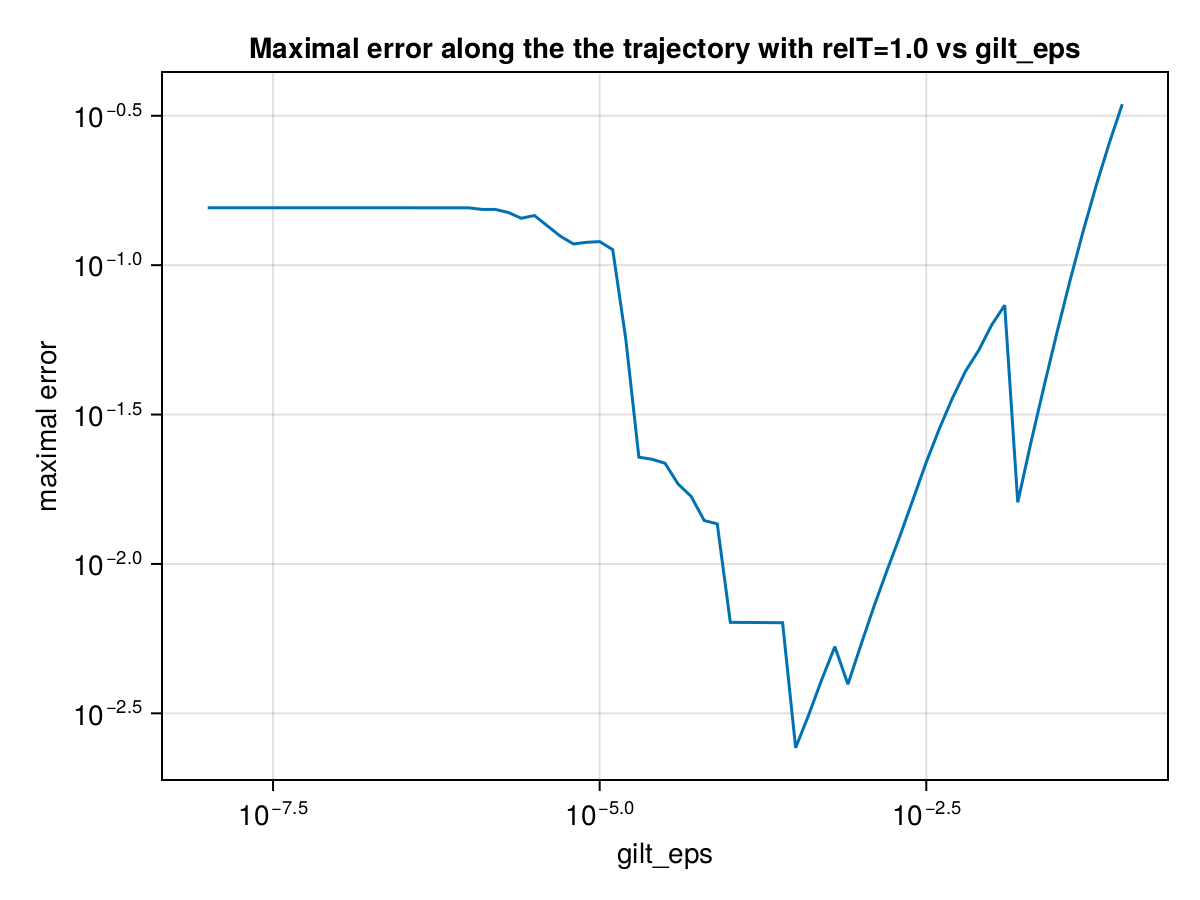

In [2]:
chi::Int64 = 10
relT::Float64 = 1.0
traj_len::Int64 = 20
cg_eps::Float64 = 1e-10
eps_low_exponent::Float64 = -8.0
eps_high_exponent::Float64 = -1.0


function epsilon_test(gilt_eps, chi=chi, cg_eps=cg_eps, relT=relT)
    gilt_pars = Dict(
        "gilt_eps" => gilt_eps,
        "cg_chis" => collect(1:chi),
        "cg_eps" => cg_eps,
        "verbosity" => 0,
        "rotate" => false,
    )
    traj = trajectory_no_saving(relT, traj_len, gilt_pars)
    error_measure = x -> sqrt((x[1])^2 + (x[2] + x[3])^2 / 4 + (x[4] + x[5])^2 / 4)
    findmax(error_measure.(traj["errs"]))[1]
end

@info "Started the test"

epsilons = 10 .^ (collect(eps_high_exponent:-0.1:eps_low_exponent))
results = epsilon_test.(epsilons)

error_measure, index = findmin(results)
optimal_epsilon = epsilons[index]

@info "Found the optimal epsilon = $optimal_epsilon giving the error = $error_measure"

fig = Figure()
ax = Axis(fig[1, 1];
    title="Maximal error along the the trajectory with relT=$relT vs gilt_eps",
    yscale=log10,
    xscale=log10,
    ylabel="maximal error",
    xlabel="gilt_eps",
)

lines!(ax, epsilons, results)

fig
